In [1]:
user_data = sc.textFile("ml-100k/u.user")
user_data.first()

u'1|24|M|technician|85711'

In [2]:
user_fields = user_data.map(lambda line: line.split("|"))
num_users = user_fields.map(lambda fields: fields[0]).count()
num_genders = user_fields.map(lambda fields: fields[2]).distinct().count()
num_occupations = user_fields.map(lambda fields: fields[3]).distinct().count()
num_zipcodes = user_fields.map(lambda fields: fields[4]).distinct().count()
print "users: %d, genders: %d, occupations: %d, zip codes: %d" % (num_users, num_genders, num_occupations, num_zipcodes)

users: 943, genders: 2, occupations: 21, zip codes: 795


In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


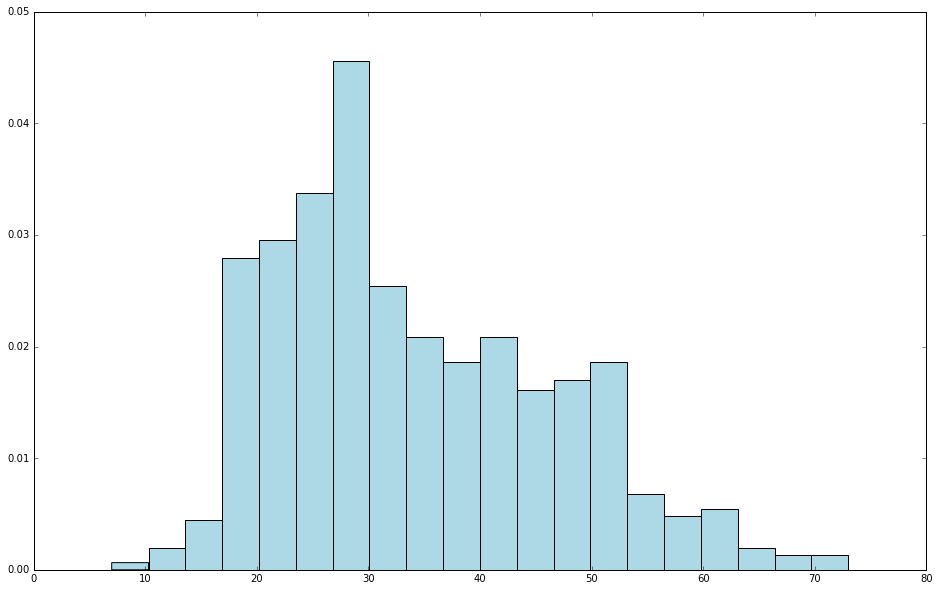

In [4]:
ages = user_fields.map(lambda x: int(x[1])).collect()
hist(ages, bins=20, color='lightblue', normed=True)
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(16, 10)

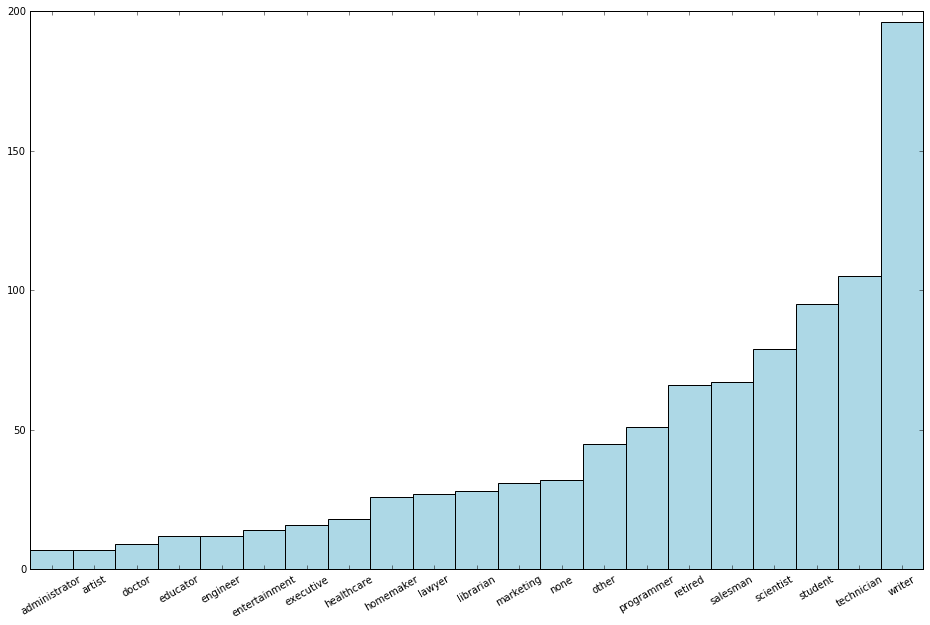

In [5]:
count_by_occupation = user_fields.map(lambda fields: (fields[3], 1)).reduceByKey(lambda a, b: a + b).collect()

x_axis1 = np.array([c[0] for c in count_by_occupation])
y_axis1 = np.array([c[1] for c in count_by_occupation])

x_axis = x_axis1[np.argsort(x_axis1)]
y_axis = y_axis1[np.argsort(y_axis1)]

pos = np.arange(len(x_axis))
width = 1.0

ax = plt.axes()
ax.set_xticks(pos + (width/2))
ax.set_xticklabels(x_axis)

plt.bar(pos, y_axis, width, color='lightblue')
plt.xticks(rotation=30)
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(16, 10)